# Analyze an example data set

In [1]:
# Load modules we'll need.
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

## Step 1: Load the data and look at it.

**Q.** Do you observe evidence of cross-frequency coupling?

### Conclusions

* 
* 

In [2]:
# Load the data.
data = loadmat('LFP-1.mat')          # Load the data,
t = data['t'][0]                     # ... extract t, the time variable,
LFP = data['LFP'][0]                 # ... and LFP, the voltage variable.
dt = t[1] - t[0]                     # Define the sampling interval,
fNQ = 1 / dt / 2                     # ... and Nyquist frequency. 

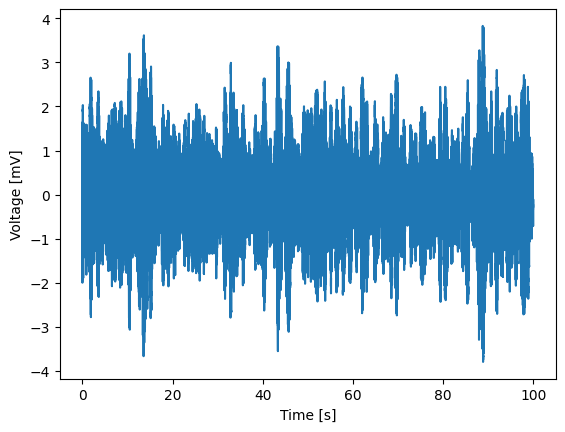

In [5]:
plt.plot(t,LFP)
plt.xlabel('Time [s]')       # ... with axes labeled.
plt.ylabel('Voltage [mV]');

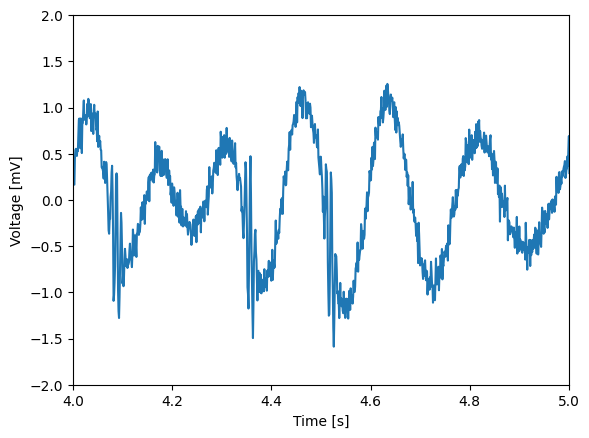

In [6]:
#zoom in 
plt.plot(t,LFP)
plt.xlim([4,5])
plt.ylim([-2, 2])
plt.xlabel('Time [s]')       # ... with axes labeled.
plt.ylabel('Voltage [mV]');
plt.show()

On visual inspection - we can see a dominant low-frequency ryhthm. there are smaller amplitude signals? of high-frequency activity

## Spectral analysis

**Q.** What rhythms are present in the data?

### Conclusions

* 
* 

We should compute a spectrum of LFP data and compute the spectrum with a hanning taper... ()

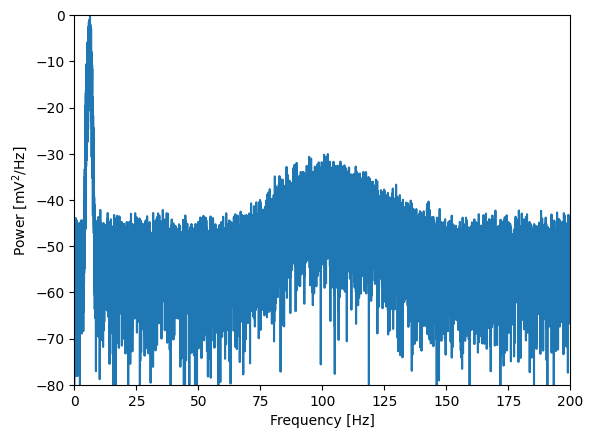

In [11]:
dt = t[1] - t[0]                # Define the sampling interval,
T = t[-1]                       # ... the duration of the data,
N = len(LFP)                    # ... and the no. of data points

x = np.hanning(N) * LFP            # Multiply data by a Hanning taper
xf = np.fft.rfft(x - x.mean())         # Compute Fourier transform
Sxx = 2*dt**2/T * (xf*np.conj(xf)) # Compute the spectrum
Sxx = np.real(Sxx)                 # Ignore complex components

df = 1 / T                      # Define frequency resolution,
fNQ = 1 / dt / 2                # ... and Nyquist frequency. 

faxis = np.arange(0, fNQ + df, df) # Construct freq. axis
plt.plot(faxis, 10 * np.log10(Sxx))    # Plot spectrum vs freq.
plt.xlim([0, 200])                  # Set freq. range, 
plt.ylim([-80, 0])                  # ... and decibel range
plt.xlabel('Frequency [Hz]')        # Label the axes
plt.ylabel('Power [mV$^2$/Hz]');

:O whats going on 

There is a large peak that is also the lowest-frequency peak around ~5 Hz. This peak corresponds to the slow rhythm we saw dominating the signal through visual inspection. 

There is another "broadband" peak around 75 - 120ish range - 

Our spectral results support my visual inspection that there are low and high frequency activities within the LFP data.

## Phase-amplitude coupling (Step 1)

**Q.** Filter the data into low and high frequency bands. What frequency bands will you choose?

**Q.** Visualize the data; does the filtering make sense?

### Conclusions

* 
* 

In [12]:
from scipy import signal

# Low frequency band. (the dominant)
Wn = [5,7];                       # Set the passband [??-??] Hz,
n = 100;                            # ... and filter order,
                                    # ... build the bandpass filter,
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
Vlo = signal.filtfilt(b, 1, LFP);   # ... and apply it to the data.

# High frequency band.
Wn = [75, 120];                      # Set the passband [??-??] Hz,
n = 100;                            # ... and filter order,
                                    # ... build the bandpass filter,
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
Vhi = signal.filtfilt(b, 1, LFP);   # ... and apply it to the data.

C:\Users\Gabrielle\AppData\Local\Temp\ipykernel_18472\888925519.py:7: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
C:\Users\Gabrielle\AppData\Local\Temp\ipykernel_18472\888925519.py:14: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');


Wn is where we choose to zoom in - this is the passband of the filter.
n is the filer order, which is going to use a bandpass filter we design using signal.firwin from scipy..... then apply that filter using signal.filtfilt from scipy.

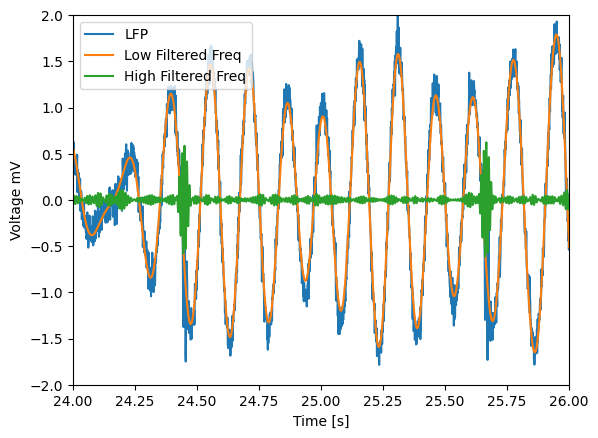

In [13]:
#and now we plot if
plt.plot(t, LFP)
plt.plot(t, Vlo) #plot the low peak 
plt.plot(t, Vhi) #plot the high freq peak
plt.xlabel('Time [s]')
plt.ylabel('Voltage mV')
plt.xlim([24, 26]); #zoom in a specific time interval to get a more detailed graph, lets say 2 seconds from 24 to 26 seconds
plt.ylim([-2,2]);
plt.legend(['LFP', 'Low Filtered Freq', "High Filtered Freq"])
plt.show()

the low-frequency band captures the large amplitiude rhythm dominating the LFP signal, while the higher frequency band isolates the brief bursts of faster activity. 

## Phase-amplitude coupling (Step 2)

**Q.** How do you extract the amplitude and phase from the filtered signals?

**Q.** For `Vhi` and `Vlo`, we need to compute the [analytic signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html), and then the [phase](https://docs.scipy.org/doc/numpy/reference/generated/numpy.angle.html) or [amplitude](https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html). What Python functions do you need?

**Q.** Visualize the amplitude and phase; does it make sense?

### Conclusions

* 
* 

## Phase-amplitude coupling (Step 3)

**Q.** Determine if the phase and amplitude are related by making a phase-amplitude histogram. What is the value of the statistic *h*?

**Q.** Does this result suggest CFC occurs in these data?

**Q.** If no CFC occurred in the data, what would you expect to find in the plot of average amplitude versus phase? 

### Conclusions

* 
* 

## Assess the significance of *h* by resampling.

**Q.** Is the value of *h* big or small?

To assess the significance of $h$, generate a surrogate phase-amplitude vector by resampling without replacement the amplitude time series (i.e., the second column of the phase-amplitude vector).

In performing this resampling, we reassign each phase an amplitude chosen randomly from the entire 100 s LFP recording. We expect that if CFC does exist in these data, then the timing of the phase and amplitude vectors will be important; for CFC to occur, the amplitude and phase must coordinate in time. By disrupting this timing in the resampling procedure, we expect to eliminate the coordination between amplitude and phase necessary to produce CFC.

For each surrogate phase-amplitude vector, we compute the statistic $h$. To generate a distribution of $h$ values, repeat 1,000 times this process of creating surrogate data through resampling and computing $h$.

### Conclusions

* 
* 